In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("immovlan_cleaned_file.csv", encoding="utf-8-sig")

# House-type 
house_types = [
    "Residence", "Villa", "Mixed Building", "Master House",
    "Cottage", "Bungalow", "Chalet", "Mansion"
]

df['type'] = df['type'].astype(str).str.strip().str.title()

# Sadece house-type kayıtlarını seç ve df1 olarak kaydet
df1 = df[df['type'].isin(house_types)].copy()

# Kontrol
print(f"House-type dataset created with {len(df1)} rows.")
print(df1['type'].value_counts())
df1.head(10)



House-type dataset created with 6088 rows.
type
Residence         5211
Villa              450
Mixed Building     196
Chalet              68
Master House        62
Cottage             50
Bungalow            45
Mansion              6
Name: count, dtype: int64


,url,Property ID,Price,State of the property,Availability,Number of bedrooms,Livable surface,Furnished,Attic,Garage,...,Surface terrace,Total land surface,Swimming pool,type,postal_code,city,Region,province,price_per_sqm,Price_per_sqm_land
2,https://immovlan.be/en/detail/residence/for-sa...,vbd46297,399000.0,NaN,NaN,2.0,129.0,NaN,NaN,1.0,...,NaN,NaN,NaN,Residence,1501,buizingen,Flanders,Flemish Brabant,3093.023256,NaN
6,https://immovlan.be/en/detail/residence/for-sa...,vbd11776,190000.0,NaN,NaN,5.0,142.0,0.0,1.0,1.0,...,NaN,320.0,NaN,Residence,6830,bouillon,Wallonia,Luxembourg,1338.028169,593.750000
9,https://immovlan.be/en/detail/residence/for-sa...,rbu64988,327850.0,To be renovated,On contract,3.0,185.0,0.0,1.0,1.0,...,21.0,683.0,0.0,Residence,9810,nazareth,Flanders,East Flanders,1772.162162,480.014641
14,https://immovlan.be/en/detail/residence/for-sa...,vbc54869,365000.0,New,NaN,3.0,203.0,0.0,1.0,1.0,...,NaN,298.0,NaN,Residence,5001,belgrade,Wallonia,Namur,1798.029557,1224.832215
18,https://immovlan.be/en/detail/residence/for-sa...,rbu61502,460000.0,NaN,NaN,4.0,178.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Residence,9420,erpe-mere,Flanders,East Flanders,2584.269663,NaN
19,https://immovlan.be/en/detail/residence/for-sa...,vbd11793,145000.0,To be renovated,Immediately,3.0,270.0,0.0,1.0,NaN,...,NaN,NaN,NaN,Residence,6830,bouillon,Wallonia,Luxembourg,537.037037,NaN
20,https://immovlan.be/en/detail/residence/for-sa...,rbu66306,125000.0,To be renovated,On contract,1.0,80.0,0.0,0.0,NaN,...,NaN,168.0,0.0,Residence,9450,denderhoutem,Flanders,East Flanders,1562.500000,744.047619
22,https://immovlan.be/en/detail/residence/for-sa...,vbd16229,310000.0,To be renovated,NaN,3.0,146.0,0.0,1.0,1.0,...,NaN,267.0,NaN,Residence,6700,arlon,Wallonia,Luxembourg,2123.287671,1161.048689
28,https://immovlan.be/en/detail/residence/for-sa...,rbu65967,449000.0,NaN,On contract,3.0,359.0,NaN,NaN,1.0,...,NaN,6932.0,NaN,Residence,3530,houthalen-helchteren,Flanders,Limburg,1250.696379,64.772072
30,https://immovlan.be/en/detail/villa/for-sale/6...,vbd38998,797000.0,Excellent,On contract,5.0,350.0,0.0,NaN,1.0,...,130.0,6145.0,1.0,Villa,6470,sivry-rance,Wallonia,Hainaut,2277.142857,129.698942


In [114]:
df1.shape

(6088, 33)

In [115]:
df1.columns

Index(['url', 'Property ID', 'Price', 'State of the property', 'Availability',
       'Number of bedrooms', 'Livable surface', 'Furnished', 'Attic', 'Garage',
       'Number of garages', 'Kitchen equipment', 'Kitchen type',
       'Number of bathrooms', 'Number of showers', 'Number of toilets',
       'Type of heating', 'Type of glazing', 'Elevator', 'Number of facades',
       'Garden', 'Surface garden', 'Terrace', 'Surface terrace',
       'Total land surface', 'Swimming pool', 'type', 'postal_code', 'city',
       'Region', 'province', 'price_per_sqm', 'Price_per_sqm_land'],
      dtype='object')

In [116]:
df2=df1.drop(['url','Availability','Attic','Kitchen equipment','Kitchen type','Furnished'],axis="columns")
df2.head()



,Property ID,Price,State of the property,Number of bedrooms,Livable surface,Garage,Number of garages,Number of bathrooms,Number of showers,Number of toilets,...,Surface terrace,Total land surface,Swimming pool,type,postal_code,city,Region,province,price_per_sqm,Price_per_sqm_land
2,vbd46297,399000.0,NaN,2.0,129.0,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,Residence,1501,buizingen,Flanders,Flemish Brabant,3093.023256,NaN
6,vbd11776,190000.0,NaN,5.0,142.0,1.0,1.0,NaN,1.0,3.0,...,NaN,320.0,NaN,Residence,6830,bouillon,Wallonia,Luxembourg,1338.028169,593.750000
9,rbu64988,327850.0,To be renovated,3.0,185.0,1.0,1.0,1.0,1.0,2.0,...,21.0,683.0,0.0,Residence,9810,nazareth,Flanders,East Flanders,1772.162162,480.014641
14,vbc54869,365000.0,New,3.0,203.0,1.0,1.0,NaN,1.0,2.0,...,NaN,298.0,NaN,Residence,5001,belgrade,Wallonia,Namur,1798.029557,1224.832215
18,rbu61502,460000.0,NaN,4.0,178.0,NaN,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,Residence,9420,erpe-mere,Flanders,East Flanders,2584.269663,NaN


In [187]:
df2.shape

(6088, 27)

In [188]:
df2.isnull().sum()

Property ID                 0
Price                     136
State of the property    1445
Number of bedrooms         63
Livable surface           369
Garage                   2501
Number of garages        3622
Number of bathrooms       611
Number of showers        4439
Number of toilets        1840
Type of heating          1643
Type of glazing          3148
Elevator                 1895
Number of facades         986
Garden                    204
Surface garden           4010
Terrace                   390
Surface terrace          4180
Total land surface        939
Swimming pool            4334
type                        0
postal_code                 0
city                        0
Region                      0
province                    0
price_per_sqm             494
Price_per_sqm_land       1053
dtype: int64

In [189]:
import numpy as np

# "nan" olan stringleri gerçek NaN'e çevir
df2["Price"] = df2["Price"].replace("nan", np.nan)

In [191]:
df3=df2.dropna(subset=["Price"])

In [193]:
df3.shape

(5952, 27)

In [192]:
df3.dtypes

Property ID               object
Price                    float64
State of the property     object
Number of bedrooms       float64
Livable surface          float64
Garage                   float64
Number of garages        float64
Number of bathrooms      float64
Number of showers        float64
Number of toilets        float64
Type of heating           object
Type of glazing           object
Elevator                 float64
Number of facades        float64
Garden                   float64
Surface garden           float64
Terrace                  float64
Surface terrace          float64
Total land surface       float64
Swimming pool            float64
type                      object
postal_code                int64
city                      object
Region                    object
province                  object
price_per_sqm            float64
Price_per_sqm_land       float64
dtype: object

In [194]:
df3.isnull().sum()

Property ID                 0
Price                       0
State of the property    1410
Number of bedrooms         53
Livable surface           358
Garage                   2450
Number of garages        3543
Number of bathrooms       582
Number of showers        4326
Number of toilets        1772
Type of heating          1584
Type of glazing          3089
Elevator                 1845
Number of facades         943
Garden                    193
Surface garden           3935
Terrace                   365
Surface terrace          4079
Total land surface        917
Swimming pool            4239
type                        0
postal_code                 0
city                        0
Region                      0
province                    0
price_per_sqm             358
Price_per_sqm_land        917
dtype: int64

##Numerical coloumns filled with median less effected by outliers

In [195]:
df4 = df3.copy()


num_cols = [
    "Number of bedrooms","Livable surface","Number of bathrooms","Number of toilets",
    "Number of facades","Surface garden","Surface terrace","Total land surface",
    "Number of garages","Number of showers"
]

for col in num_cols:
    df4[col] = pd.to_numeric(df4[col], errors="coerce")
    df4[col] = df4[col].fillna(df4[col].median())


In [196]:
df4[num_cols].isna().sum()

Number of bedrooms     0
Livable surface        0
Number of bathrooms    0
Number of toilets      0
Number of facades      0
Surface garden         0
Surface terrace        0
Total land surface     0
Number of garages      0
Number of showers      0
dtype: int64

In [197]:
df4[num_cols].describe()

,Number of bedrooms,Livable surface,Number of bathrooms,Number of toilets,Number of facades,Surface garden,Surface terrace,Total land surface,Number of garages,Number of showers
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,3.497984,199.270833,1.394489,2.048219,3.054940,578.571909,28.186660,1010.627688,1.459845,1.343414
std,1.519933,119.818759,1.134372,1.152697,0.747261,3628.382162,68.288914,3306.200992,25.130900,9.666894
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000
25%,3.000000,141.000000,1.000000,2.000000,2.000000,330.000000,24.000000,285.000000,1.000000,1.000000
50%,3.000000,174.000000,1.000000,2.000000,3.000000,330.000000,24.000000,494.000000,1.000000,1.000000
75%,4.000000,219.000000,2.000000,2.000000,4.000000,330.000000,24.000000,866.250000,1.000000,1.000000
max,50.000000,2350.000000,50.000000,50.000000,4.000000,200000.000000,2968.000000,101895.000000,1936.000000,482.000000


##Binary coloumn converted 0 and 1

In [198]:
df5 = df4.copy()
binary_cols = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]

for col in binary_cols:
    df5[col] = df5[col].fillna(0)
    df5[col] = df5[col].apply(lambda x: 1 if x != 0 else 0)
df5[binary_cols].head()


,Garage,Garden,Terrace,Elevator,Swimming pool
2,1,1,0,0,0
6,1,1,1,0,0
9,1,1,1,0,0
14,1,1,1,0,0
18,0,1,0,0,0


In [199]:

print(df5['Garage'].isna().sum())

# 2. check all binary col
binary_cols = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]
print(df5[binary_cols].isna().sum())

print(df5[df5['Garage'].isna()])


0
Garage           0
Garden           0
Terrace          0
Elevator         0
Swimming pool    0
dtype: int64
Empty DataFrame
Columns: [Property ID, Price, State of the property, Number of bedrooms, Livable surface, Garage, Number of garages, Number of bathrooms, Number of showers, Number of toilets, Type of heating, Type of glazing, Elevator, Number of facades, Garden, Surface garden, Terrace, Surface terrace, Total land surface, Swimming pool, type, postal_code, city, Region, province, price_per_sqm, Price_per_sqm_land]
Index: []

[0 rows x 27 columns]


##OUTLIERS REMOVAL

In [200]:
df5['Price'].describe()


count    5.952000e+03
mean     4.281538e+05
std      3.225572e+05
min      5.000000e+03
25%      2.650000e+05
50%      3.698880e+05
75%      4.947192e+05
max      8.600002e+06
Name: Price, dtype: float64

Price with outliers

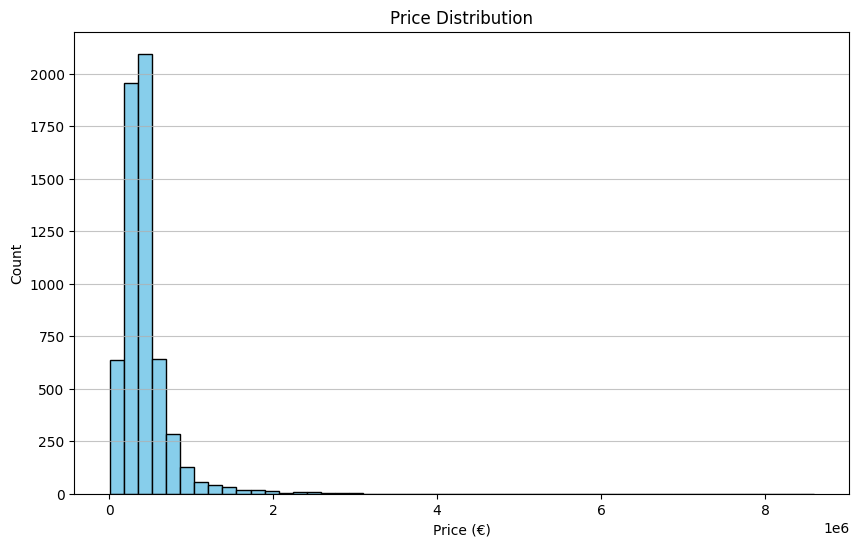

In [201]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df5['Price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.grid(axis='y', alpha=0.75)
plt.show()


In [131]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

fig = px.box(df5, y="Price", points="all", title="House Price Distribution with Outliers")
fig.show()


Items with outliers

In [ ]:
import matplotlib.pyplot as plt

# Numeric columns list
numeric_cols = [
    "Price",
    "Number of bedrooms",
    "Livable surface",
    "Number of bathrooms",
    "Number of toilets",
    "Number of facades",
    "Surface garden",
    "Surface terrace",
    "Total land surface",
    "Number of garages",
    "Number of showers"
]

# Boxplot ile outlierları görselleştirme
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    plt.boxplot(df5[col], vert=False)
    plt.title(f"{col} Distribution with Outliers")
    plt.xlabel(col)
    plt.show()


Items with outliers

In [203]:
import plotly.express as px

numeric_cols = [
    "Price",
    "Number of bedrooms",
    "Livable surface",
    "Number of bathrooms",
    "Number of toilets",
    "Number of facades",
    "Surface garden",
    "Surface terrace",
    "Total land surface",
    "Number of garages",
    "Number of showers"
]

for col in numeric_cols:
    fig = px.box(
        df5,
        y=col,
        points="all",  # tüm noktaları ve outlier’ları göster
        title=f"{col} Distribution with Outliers"
    )
    fig.show()


OUTLIER REMOVAL - BOXPLOT BEFORE/AFTER

In [ ]:


# ---- 1) Custom Outlier Thresholds ----

outlier_rules = {
    "Number of garages": {"min": 0, "max": 50},
    "Number of showers": {"min": 0, "max": 50},
    "Number of bedrooms": {"min": 1, "max": 50}
}
# ---- 2) BEFORE = df5 ----
df_before = df5.copy()

# ---- 3) Temizleme Fonksiyonu ----
def remove_outliers(df, rules):
    df_clean = df.copy()
    for col, limits in rules.items():
        if "min" in limits:
            df_clean = df_clean[df_clean[col] >= limits["min"]]
        if "max" in limits:
            df_clean = df_clean[df_clean[col] <= limits["max"]]
    return df_clean

# ---- 4) OUTLIER CLEANING → df6 ----
df6 = remove_outliers(df5, outlier_rules)

print("Before:", len(df5))
print("After :", len(df6))
print("Removed:", len(df5) - len(df6))

# ---- 5) BEFORE vs AFTER BOX PLOTS ----
for col in outlier_rules.keys():
    plt.figure(figsize=(9,4))
    plt.boxplot(
        [df_before[col], df6[col]],
        labels=["Before", "After"],
        vert=False
    )
    plt.title(f"{col} – Before vs After Outlier Removal")
    plt.xlabel(col)
    plt.show()


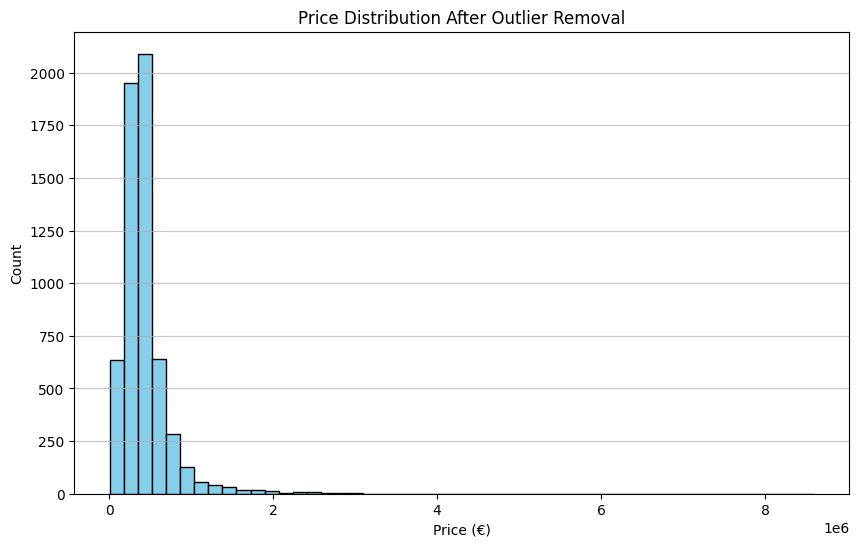

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df6['Price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.title("Price Distribution After Outlier Removal")
plt.grid(axis='y', alpha=0.75)
plt.show()


Outliers box plot before/after

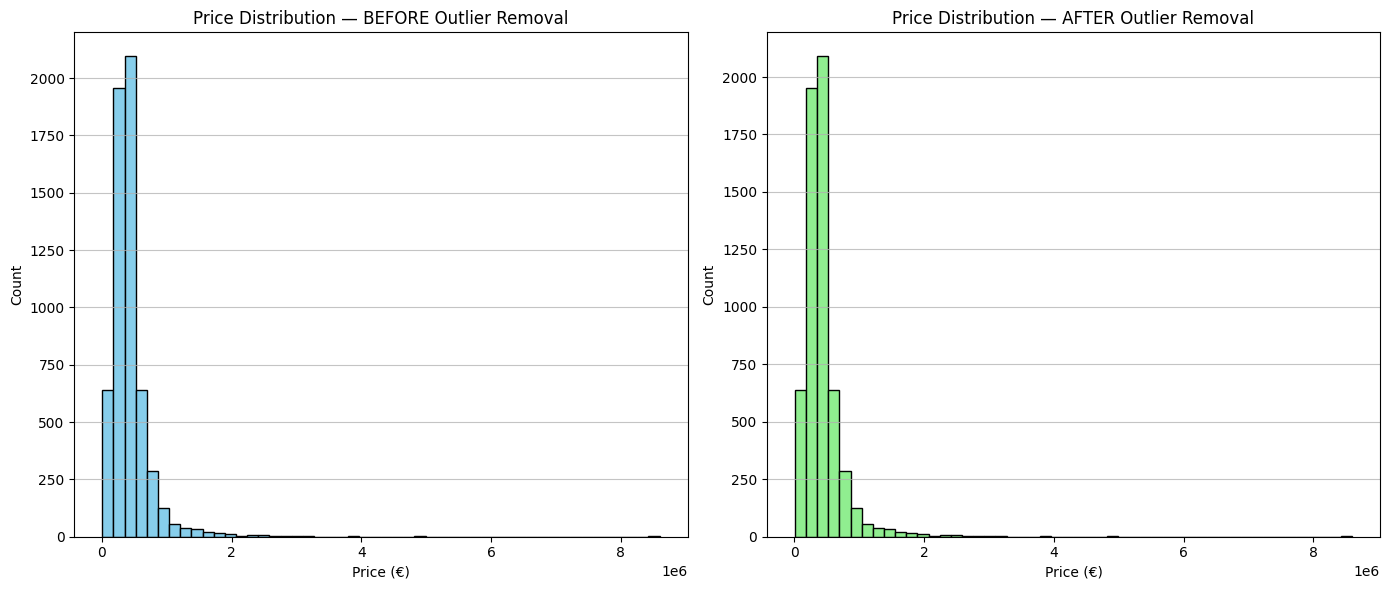

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# --- BEFORE (df5) ---
plt.subplot(1, 2, 1)
plt.hist(df5['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title("Price Distribution — BEFORE Outlier Removal")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.75)

# --- AFTER (df6) ---
plt.subplot(1, 2, 2)
plt.hist(df6['Price'], bins=50, color='lightgreen', edgecolor='black')
plt.title("Price Distribution — AFTER Outlier Removal")
plt.xlabel("Price (€)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


Outliers box plot before/after

In [206]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

numeric_cols = [
    "Price", "Number of bedrooms", "Livable surface", "Number of bathrooms",
    "Number of toilets", "Number of facades", "Surface garden", 
    "Surface terrace", "Total land surface", "Number of garages",
    "Number of showers"
]

# --- Correct subplot titles ---
titles = []
for col in numeric_cols:
    titles.append(f"{col} – BEFORE")
    titles.append(f"{col} – AFTER")

# --- Create subplots ---
fig = make_subplots(
    rows=len(numeric_cols),
    cols=2,
    subplot_titles=titles,
    vertical_spacing=0.06
)

# --- Add traces row by row ---
for row_i, col in enumerate(numeric_cols, start=1):

    # BEFORE
    fig.add_trace(
        go.Box(
            y=df5[col],
            name=f"{col} BEFORE",
            boxpoints="outliers"
        ),
        row=row_i, col=1
    )

    # AFTER
    fig.add_trace(
        go.Box(
            y=df6[col],
            name=f"{col} AFTER",
            boxpoints="outliers"
        ),
        row=row_i, col=2
    )


fig.update_layout(
    height=350 * len(numeric_cols),
    width=1100,
    title="Outlier Removal — BEFORE vs AFTER (All Numeric Columns Side-by-Side)",
    showlegend=False
)

fig.show()


REMOVED OUTLIERS EXAMINATION

In [207]:
# Outlier nedeniyle çıkarılan satırları al
removed_outliers = df5[~df5.index.isin(df6.index)].copy()

# Kaç satır çıkarıldı
print(f"Removed outliers: {len(removed_outliers)} rows")

# İlk 5 satırı göster
removed_outliers.head()


Removed outliers: 12 rows


,Property ID,Price,State of the property,Number of bedrooms,Livable surface,Garage,Number of garages,Number of bathrooms,Number of showers,Number of toilets,...,Surface terrace,Total land surface,Swimming pool,type,postal_code,city,Region,province,price_per_sqm,Price_per_sqm_land
1677,vbd49633,550000.0,To be renovated,0.0,200.0,0,1.0,1.0,1.0,2.0,...,24.0,79.0,0,Residence,1050,elsene,Brussels,Brussels,2750.000000,6962.025316
5857,vba87665,415000.0,New,4.0,133.0,0,1.0,2.0,415.0,2.0,...,24.0,625.0,0,Residence,5310,aische-en-refail,Wallonia,Namur,3120.300752,664.000000
9363,vbd42447,179000.0,To be renovated,0.0,363.0,0,1.0,1.0,1.0,2.0,...,16.0,2966.0,0,Residence,6830,poupehan,Wallonia,Luxembourg,493.112948,60.350641
9484,vbc87224,349000.0,Normal,8.0,175.0,1,1.0,3.0,390.0,2.0,...,16.0,312.0,0,Mixed Building,6800,libramont-chevigny,Wallonia,Luxembourg,1994.285714,1118.589744
9882,rbu55839,399000.0,Normal,4.0,251.0,1,1936.0,1.0,1.0,2.0,...,50.0,119.0,0,Residence,1731,relegem,Flanders,Flemish Brabant,1589.641434,3352.941176


In [208]:
# Outlier nedeniyle çıkarılan satırlar
removed_outliers = df5[~df5.index.isin(df6.index)].copy()

# Kaç satır çıkarıldı
print(f"Removed outliers: {len(removed_outliers)} rows")

# Sadece önemli kolonları al (istediğin kolonları ekleyebilirsin)
important_cols = ["Property ID", "Price", "Number of bedrooms", "Livable surface", 
                  "Total land surface", "Number of garages", "Number of bathrooms"]
removed_outliers_simple = removed_outliers[important_cols]

# İlk 10 satırı göster
removed_outliers_simple.head(10)


Removed outliers: 12 rows


,Property ID,Price,Number of bedrooms,Livable surface,Total land surface,Number of garages,Number of bathrooms
1677,vbd49633,550000.0,0.0,200.0,79.0,1.0,1.0
5857,vba87665,415000.0,4.0,133.0,625.0,1.0,2.0
9363,vbd42447,179000.0,0.0,363.0,2966.0,1.0,1.0
9484,vbc87224,349000.0,8.0,175.0,312.0,1.0,3.0
9882,rbu55839,399000.0,4.0,251.0,119.0,1936.0,1.0
11068,vbd45788,99999.0,0.0,91.0,494.0,1.0,1.0
11277,vbd46461,280000.0,0.0,174.0,181.0,1.0,1.0
11968,vbd30007,399000.0,3.0,216.0,1220.0,111.0,1.0
12098,rbu66858,285000.0,0.0,189.0,379.0,1.0,1.0
12839,vbd08297,175000.0,2.0,122.0,575.0,1.0,1.0


In [209]:
# Outlier satırlar (df5: orijinal, df6: outlier temizlenmiş)
removed_outliers = df5[~df5.index.isin(df6.index)].copy()

# Önemli kolonlar
important_cols = ["Property ID", "Price", "Number of bedrooms", "Livable surface", 
                  "Total land surface", "Number of garages", "Number of bathrooms"]

removed_outliers = removed_outliers[important_cols]

# Her kolon için outlier flag ve değerlerini al
outlier_list = []

for col in important_cols[1:]:  # Property ID hariç
    temp = removed_outliers[["Property ID", col]].copy()
    temp = temp.rename(columns={col: "Value"})
    temp["Column"] = col
    outlier_list.append(temp)

# Tek dataframe olarak birleştir
property_outliers_full = pd.concat(outlier_list, ignore_index=True)

# Örnek çıktı
property_outliers_full.head(20)

property_outliers_full.to_csv("property_outliers_full.csv", index=False)



In [210]:
# Önceki adımda oluşturduğumuz property_outliers_full kullanıyoruz
# property_outliers_full.columns = ["Property ID", "Value", "Column"]

# Pivot table: satır = Property ID, kolon = numeric kolonlar, değer = outlier değeri
pivot_outliers = property_outliers_full.pivot_table(
    index="Property ID",
    columns="Column",
    values="Value",
    aggfunc="first"  # birden fazla değer varsa ilkini al
)

# Outlier olmayan kolonlar NaN olacak
pivot_outliers.head(20)

pivot_outliers.to_csv("property_outliers_pivot.csv")

property_outliers_full.to_csv("property_outliers_full.csv", index=False)


In [211]:
df7 = df6.copy()

In [212]:
df7[(df7["Price"] >= 2_000_000) & (df7["Price"] <= 5_000_000)].shape[0]


32

In [213]:
df7.columns

Index(['Property ID', 'Price', 'State of the property', 'Number of bedrooms',
       'Livable surface', 'Garage', 'Number of garages', 'Number of bathrooms',
       'Number of showers', 'Number of toilets', 'Type of heating',
       'Type of glazing', 'Elevator', 'Number of facades', 'Garden',
       'Surface garden', 'Terrace', 'Surface terrace', 'Total land surface',
       'Swimming pool', 'type', 'postal_code', 'city', 'Region', 'province',
       'price_per_sqm', 'Price_per_sqm_land'],
      dtype='object')

In [214]:
# --- Extreme rules with min & max criteria ---
extreme_rules = {
    "Price": {"min": 50_000, "max": 2_000_000},             # very cheap or very expensive
    "Livable surface": {"min": 20, "max": 1000},            # very small or very large
    "Total land surface": {"min": 10, "max": 3000},         # very small or huge land
    "Number of bedrooms": {"min": 1, "max": 8},
    "Number of garages": {"min": 0, "max": 5},
    "Surface terrace": {"min": 0, "max": 150},
    "Surface garden": {"min": 0, "max": 2000},
    "Number of bathrooms": {"min": 1, "max": 5}, 
    "Number of toilets": {"min": 1, "max": 5}, 
    "Number of showers": {"min": 1, "max": 5}
}

def is_extreme(row):
    for col, limits in extreme_rules.items():
        if col in row:
            if row[col] < limits["min"] or row[col] > limits["max"]:
                return True
    return False

# Apply to df7
df7["is_extreme"] = df7.apply(is_extreme, axis=1)

# Split datasets
df_extreme = df7[df7["is_extreme"] == True].copy()
df_model = df7[df7["is_extreme"] == False].copy()

print("Normal houses (df_model):", len(df_model))
print("Extreme houses (df_extreme):", len(df_extreme))


Normal houses (df_model): 5442
Extreme houses (df_extreme): 498


In [145]:
extreme_rules = {
    "Price": 2_000_000,             # çok pahalı evler
    "Livable surface": 1000,         # çok büyük iç alan
    "Total land surface": 3000,     # dev bahçe / çiftlik
    "Number of bedrooms": 8,        # normal evden fazla
    "Number of garages": 5,         # çok garajlı (at çiftliği vb.)
    "Surface terrace": 150,
    "Surface garden": 2000,
    "Number of bathrooms": 5, 
    "Number of toilets": 5, 
    "Number of showers" : 5
}


def is_extreme(row):
    return (
        row["Price"] > extreme_rules["Price"] or
        row["Livable surface"] > extreme_rules["Livable surface"] or
        row["Total land surface"] > extreme_rules["Total land surface"] or
        row["Number of bedrooms"] > extreme_rules["Number of bedrooms"] or
        row["Number of garages"] > extreme_rules["Number of garages"] or
        row["Surface terrace"] > extreme_rules["Surface terrace"] or
        row["Surface garden"] > extreme_rules["Surface garden"] or
        row["Number of bathrooms"] > extreme_rules["Number of bathrooms"] or
        row["Number of toilets"] > extreme_rules["Number of toilets"] or
        row["Number of showers"] > extreme_rules["Number of showers"]
    )

df7["is_extreme"] = df7.apply(is_extreme, axis=1)

# Extreme dataset
df_extreme = df7[df7["is_extreme"] == True].copy()

# Normal modelling dataset
df_model = df7[df7["is_extreme"] == False].copy()

print("Normal houses(df_model):", len(df_model))
print("Extreme houses (df_extreme):", len(df_extreme))


Normal houses(df_model): 5496
Extreme houses (df_extreme): 444


1000 / 2000 kiyaslama

In [146]:
# --- Garden limitlerine göre iki extreme versiyonu ---
extreme_rules_1000 = extreme_rules.copy()
extreme_rules_1000["Surface garden"] = 1000

extreme_rules_2000 = extreme_rules.copy()
extreme_rules_2000["Surface garden"] = 2000


def is_extreme_with_rules(row, rules):
    return (
        row["Price"] > rules["Price"] or
        row["Livable surface"] > rules["Livable surface"] or
        row["Total land surface"] > rules["Total land surface"] or
        row["Number of bedrooms"] > rules["Number of bedrooms"] or
        row["Number of garages"] > rules["Number of garages"] or
        row["Surface terrace"] > rules["Surface terrace"] or
        row["Surface garden"] > rules["Surface garden"]
    )


df7["extreme_garden1000"] = df7.apply(lambda r: is_extreme_with_rules(r, extreme_rules_1000), axis=1)
df7["extreme_garden2000"] = df7.apply(lambda r: is_extreme_with_rules(r, extreme_rules_2000), axis=1)

df_extreme_1000 = df7[df7["extreme_garden1000"] == True].copy()
df_extreme_2000 = df7[df7["extreme_garden2000"] == True].copy()


In [147]:
print("Garden > 1000:", len(df_extreme_1000))
print("Garden > 2000 ", len(df_extreme_2000))


Garden > 1000: 609
Garden > 2000  411


In [148]:
compare_stats = pd.DataFrame({
    "Garden>1000": df_extreme_1000[["Price", "Livable surface", "Total land surface", "Surface garden"]].mean(),
    "Garden>2000": df_extreme_2000[["Price", "Livable surface", "Total land surface", "Surface garden"]].mean()
})

compare_stats


,Garden>1000,Garden>2000
Price,798617.011494,908557.878345
Livable surface,334.003284,376.613139
Total land surface,4847.290640,6416.766423
Surface garden,2789.545156,3433.817518


Total land surface outlier analysis

In [149]:
bins = [0, 1000, 2000, 3000, 5000, 10000]
labels = ["0-1k", "1k-2k", "2k-3k", "3k-5k", "5k+"]

df7["land_group"] = pd.cut(df7["Total land surface"], bins=bins, labels=labels)

df7.groupby("land_group")[["Price", "Livable surface", "Total land surface"]].mean()


C:\Users\esram\AppData\Local\Temp\ipykernel_4512\1300871972.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Price,Livable surface,Total land surface
land_group,,,
0-1k,377472.102477,179.567891,424.424637
1k-2k,507754.279841,232.606101,1365.448276
2k-3k,678041.060870,288.439130,2435.208696
3k-5k,708413.500000,325.565789,3737.078947
5k+,935833.333333,374.166667,7121.439394


In [ ]:
df7[(df7["Price"] >= 2_000_000) & (df7["Price"] <= 5_000_000)]


In [216]:
df8 = df_model.copy() 

In [217]:
df8.shape

(5442, 28)

df7 BEFORE /df8 AFTER (removal of outliers based on extreme criterias)

In [221]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

numeric_cols = [
    "Price", "Number of bedrooms", "Livable surface", "Number of bathrooms",
    "Number of toilets", "Surface garden", 
    "Surface terrace", "Total land surface", "Number of garages",
    "Number of showers"
]

# --- Correct subplot titles ---
titles = []
for col in numeric_cols:
    titles.append(f"{col} – BEFORE (df7)")
    titles.append(f"{col} – AFTER (df8)")

# --- Create subplots ---
fig = make_subplots(
    rows=len(numeric_cols),
    cols=2,
    subplot_titles=titles,
    vertical_spacing=0.06
)

# --- Add traces row by row ---
for row_i, col in enumerate(numeric_cols, start=1):

    # BEFORE = df7
    fig.add_trace(
        go.Box(
            y=df7[col],
            name=f"{col} BEFORE",
            boxpoints="outliers"
        ),
        row=row_i, col=1
    )

    # AFTER = df8
    fig.add_trace(
        go.Box(
            y=df8[col],
            name=f"{col} AFTER",
            boxpoints="outliers"
        ),
        row=row_i, col=2
    )

fig.update_layout(
    height=350 * len(numeric_cols),
    width=1100,
    title="Outlier Removal — BEFORE (df7) vs AFTER (df8) — All Numeric Columns",
    showlegend=False
)

fig.show()


Which cities have the highest average house prices?

PPT GRAPH

In [233]:
df8.columns

Index(['Property ID', 'Price', 'State of the property', 'Number of bedrooms',
       'Livable surface', 'Garage', 'Number of garages', 'Number of bathrooms',
       'Number of showers', 'Number of toilets', 'Type of heating',
       'Type of glazing', 'Elevator', 'Number of facades', 'Garden',
       'Surface garden', 'Terrace', 'Surface terrace', 'Total land surface',
       'Swimming pool', 'type', 'postal_code', 'city', 'Region', 'province',
       'price_per_sqm', 'Price_per_sqm_land', 'is_extreme'],
      dtype='object')

Avg price per province with mean

In [234]:
import plotly.express as px

# Calculate average house price per province
province_avg = df8.groupby("province", as_index=False)["Price"].mean()
province_avg = province_avg.sort_values("Price", ascending=False)

# Plot with bright colors
fig_province = px.bar(
    province_avg,
    x="province",
    y="Price",
    title="Average House Price by Province (mean)",
    labels={"Price": "Average Price (€)", "province": "Province"},
    color="Price",
    color_continuous_scale="Turbo",  # vibrant color scale
)

fig_province.update_layout(
    xaxis_tickangle=45,
    height=600,
    template="plotly_white",
    showlegend=False,
)

fig_province.show()


Avg price per province with median

In [225]:
import pandas as pd
import plotly.express as px

# 1 — City-level median + count
city_stats = df8.groupby(["province", "city"]).agg(
    median_price=("Price", "median"),
    count=("Price", "size")
).reset_index()

# 2 — Minimum sample filter (ör: en az 20 ev)
city_filtered = city_stats[city_stats["count"] >= 20].copy()

# 3 — Province average (city medians üzerinden)
province_avg = city_filtered.groupby("province")["median_price"].mean().reset_index()
province_avg = province_avg.sort_values("median_price", ascending=False)

# 4 — Plot
fig = px.bar(
    province_avg,
    x="province",
    y="median_price",
    title="True Most Expensive Provinces (Filtered & Median-based)",
    labels={"median_price": "Median Price (€)", "province": "Province"},
    color="median_price",
    color_continuous_scale="Turbo"
)

fig.update_layout(
    xaxis_tickangle=45,
    height=600,
    template="plotly_white",
    showlegend=False
)

fig.show()


Avg price per province per city with mean

In [240]:
import plotly.graph_objects as go
import pandas as pd

# Calculate average house price per city within each province
province_city_avg = df8.groupby(["province", "city"], as_index=False)["Price"].mean()

# Select top 3 cities per province
top3_cities_per_province = (
    province_city_avg.sort_values(["province", "Price"], ascending=[True, False])
    .groupby("province")
    .head(3)
)

# Calculate total average price per province (for ordering and width)
province_total_price = top3_cities_per_province.groupby("province")["Price"].mean().reset_index()
province_total_price = province_total_price.sort_values("Price", ascending=False)

# Reorder provinces in top3_cities_per_province
top3_cities_per_province["province"] = pd.Categorical(
    top3_cities_per_province["province"],
    categories=province_total_price["province"],
    ordered=True
)

# Define bar widths proportional to total province price
province_widths = dict(zip(province_total_price["province"], province_total_price["Price"]))

# Create grouped bar chart with variable widths
fig = go.Figure()

for province in province_total_price["province"]:
    cities = top3_cities_per_province[top3_cities_per_province["province"] == province]
    fig.add_trace(go.Bar(
        x=[province]*len(cities),
        y=cities["Price"],
        name=None,  # Hide legend for now
        text=cities["city"],
        hovertext=cities["city"],
        width=[province_widths[province]/max(province_widths.values())*0.8]*len(cities),  # scale widths
        marker_color=cities["Price"],
    ))

fig.update_layout(
    title="Top 3 Most Expensive Cities per Province (Bars Width ~ Avg Price)",
    xaxis_title="Province",
    yaxis_title="Average Price (€)",
    barmode="group",
    template="plotly_white",
    xaxis_tickangle=45,
    height=600,
    showlegend=False
)

fig.show()


Avg price per province per city with median and with min 30 cities

In [252]:
import plotly.graph_objects as go
import pandas as pd

# --- 1) Calculate median house price per city within each province ---
province_city_median = df8.groupby(["province", "city"], as_index=False)["Price"].median()

# --- 2) Select top 3 cities per province by median ---
top3_cities_per_province = (
    province_city_median.sort_values(["province", "Price"], ascending=[True, False])
    .groupby("province")
    .head(3)
)

# --- 3) Calculate total average median price per province (for ordering & width) ---
province_total_price = top3_cities_per_province.groupby("province")["Price"].mean().reset_index()
province_total_price = province_total_price.sort_values("Price", ascending=False)

# --- 4) Reorder provinces in top3_cities_per_province ---
top3_cities_per_province["province"] = pd.Categorical(
    top3_cities_per_province["province"],
    categories=province_total_price["province"],
    ordered=True
)

# --- 5) Define bar widths proportional to total province median ---
province_widths = dict(zip(province_total_price["province"], province_total_price["Price"]))

# --- 6) Create grouped bar chart ---
fig = go.Figure()

for province in province_total_price["province"]:
    cities = top3_cities_per_province[top3_cities_per_province["province"] == province]
    fig.add_trace(go.Bar(
        x=[province]*len(cities),
        y=cities["Price"],
        name=None,  # Hide legend for now
        text=cities["city"],
        hovertext=cities.apply(lambda r: f"{r['city']}<br>Median Price: €{r['Price']:,.0f}", axis=1),
        width=[province_widths[province]/max(province_widths.values())*0.8]*len(cities),  # scale widths
        marker_color=cities["Price"],
    ))

fig.update_layout(
    title="Top 3 Most Expensive Cities per Province (Median Price, Bars Width ~ Avg Median)",
    xaxis_title="Province",
    yaxis_title="Median Price (€)",
    barmode="group",
    template="plotly_white",
    xaxis_tickangle=45,
    height=600,
    showlegend=False
)

fig.show()


deneme gent

In [251]:
import pandas as pd
import plotly.express as px

# --- Choose province ---
selected_province = "East Flanders"

# --- Compute mean price per city ---
city_stats = df8.groupby(["province", "city"]).agg(
    mean_price=("Price", "mean"),
    count=("Price", "size")
).reset_index()

# --- Filter: only cities in the selected province with at least 20 listings ---
province_cities = city_stats[(city_stats["province"] == selected_province) & (city_stats["count"] >= 20)]

# --- Sort cities by mean price descending ---
province_cities = province_cities.sort_values("mean_price", ascending=False)

# --- Display table ---
print(province_cities)

# --- Plot all cities ---
fig = px.bar(
    province_cities,
    x="city",
    y="mean_price",
    text="mean_price",
    title=f"All Cities in {selected_province} by Mean House Price",
    labels={"mean_price": "Mean Price (€)", "city": "City"},
    color="mean_price",
    color_continuous_scale="Turbo"
)

fig.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
fig.update_layout(template="plotly_white", xaxis_tickangle=45, height=600)

fig.show()


          province            city     mean_price  count
208  East Flanders       oostakker  439416.228571     35
147  East Flanders          deinze  428951.270270     37
132  East Flanders          astene  411173.913043     23
163  East Flanders  geraardsbergen  364580.500000     32
214  East Flanders           ronse  251248.041667     24


In [156]:
df8.columns

Index(['Property ID', 'Price', 'State of the property', 'Number of bedrooms',
       'Livable surface', 'Garage', 'Number of garages', 'Number of bathrooms',
       'Number of showers', 'Number of toilets', 'Type of heating',
       'Type of glazing', 'Elevator', 'Number of facades', 'Garden',
       'Surface garden', 'Terrace', 'Surface terrace', 'Total land surface',
       'Swimming pool', 'type', 'postal_code', 'city', 'Region', 'province',
       'price_per_sqm', 'Price_per_sqm_land', 'is_extreme'],
      dtype='object')

How do additional features (Garage, Garden, Terrace, Elevator, Swimming Pool) impact price?

In [157]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Open charts in browser
pio.renderers.default = "browser"

# List of features exactly as they appear in df8
features = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]

# Clean DataFrame: remove rows with missing Price
feature_df = df8.dropna(subset=["Price"])

# Convert features to boolean
for feature in features:
    if feature in feature_df.columns:
        feature_df[feature] = feature_df[feature].astype(bool)

# Calculate average price for each feature (Yes vs No)
avg_prices = []
for feature in features:
    if feature in feature_df.columns:
        avg_yes = feature_df[feature_df[feature]]["Price"].mean()
        avg_no = feature_df[~feature_df[feature]]["Price"].mean()
        avg_prices.append({"Feature": feature, "Has Feature": "Yes", "Average Price": avg_yes})
        avg_prices.append({"Feature": feature, "Has Feature": "No", "Average Price": avg_no})

avg_prices_df = pd.DataFrame(avg_prices)

# Bar chart: Price with/without each feature
fig = px.bar(
    avg_prices_df,
    x="Feature",
    y="Average Price",
    color="Has Feature",
    barmode="group",
    title="Impact of Additional Features on House Price",
    labels={"Average Price": "Average Price (€)"}
)

fig.update_layout(
    template="plotly_white",
    height=600,
    xaxis_tickangle=0
)

fig.show()


In [158]:
df8.groupby("type")["type"].agg("count")

type
Bungalow            41
Chalet              57
Cottage             30
Mansion              3
Master House        53
Mixed Building     167
Residence         4802
Villa              343
Name: type, dtype: int64

In [159]:
columns_to_check = [
    'Number of bedrooms', 'Livable surface', 'Number of garages',
    'Number of bathrooms', 'Number of showers', 'Number of toilets',
    'Surface garden', 'Surface terrace'
]

for col in columns_to_check:
    print(f"\n--- {col} ---")
    print(df8[col].describe().apply(lambda x: format(x, ',.0f')))



--- Number of bedrooms ---
count    5,496
mean         3
std          1
min          1
25%          3
50%          3
75%          4
max          8
Name: Number of bedrooms, dtype: object

--- Livable surface ---
count    5,496
mean       185
std         84
min          1
25%        140
50%        174
75%        208
max      1,000
Name: Livable surface, dtype: object

--- Number of garages ---
count    5,496
mean         1
std          0
min          1
25%          1
50%          1
75%          1
max          5
Name: Number of garages, dtype: object

--- Number of bathrooms ---
count    5,496
mean         1
std          1
min          1
25%          1
50%          1
75%          1
max          5
Name: Number of bathrooms, dtype: object

--- Number of showers ---
count    5,496
mean         1
std          0
min          1
25%          1
50%          1
75%          1
max          5
Name: Number of showers, dtype: object

--- Number of toilets ---
count    5,496
mean         2
std        

In [160]:
# Create Price per m² column in your main DataFrame
df8['Price_per_m2'] = df8['Price'] / df8['Livable surface']

# Check the first few rows
df8[['Price', 'Livable surface', 'Price_per_m2']].head(20)


,Price,Livable surface,Price_per_m2
2,399000.0,129.0,3093.023256
6,190000.0,142.0,1338.028169
9,327850.0,185.0,1772.162162
14,365000.0,203.0,1798.029557
18,460000.0,178.0,2584.269663
19,145000.0,270.0,537.037037
20,125000.0,80.0,1562.500000
22,310000.0,146.0,2123.287671
34,521200.0,175.0,2978.285714
39,490000.0,150.0,3266.666667


In [161]:
import plotly.express as px

# Clean 'Price' column and convert to numeric
df8['Price'] = df8['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df8['Price'] = pd.to_numeric(df8['Price'], errors='coerce')

# Calculate average price per city
avg_price = df8.groupby('city')['Price'].mean().reset_index()

# Sort descending by Price
top20 = avg_price.sort_values('Price', ascending=False).head(20)

# Plot with Plotly
fig = px.bar(
    top20,
    x='city',
    y='Price',
    title='Top 20 Cities by Average House Price',
    labels={'Price': 'Average Price (€)', 'city': 'City'},
    color='Price',  # color intensity based on Price
    color_continuous_scale='Turbo',
)

# Update layout
fig.update_layout(
    xaxis_tickangle=45,
    height=600,
    template='plotly_white',
    showlegend=False,
)

fig.show()


In [162]:
import plotly.express as px
import pandas as pd

# Clean 'Price_per_m2' column and convert to numeric
df8['Price_per_m2'] = df8['Price_per_m2'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df8['Price_per_m2'] = pd.to_numeric(df8['Price_per_m2'], errors='coerce')

# Calculate average Price_per_m2 per city
avg_price_m2 = df8.groupby('city')['Price_per_m2'].mean().reset_index()

# Sort descending by Price_per_m2
top20 = avg_price_m2.sort_values('Price_per_m2', ascending=False).head(20)

# Plot with Plotly
fig = px.bar(
    top20,
    x='city',
    y='Price_per_m2',
    title='Top 20 Cities by Average Price per m²',
    labels={'Price_per_m2': 'Average Price per m² (€)', 'city': 'City'},
    color='Price_per_m2',  # color intensity based on Price_per_m2
    color_continuous_scale='Turbo',
)

# Update layout
fig.update_layout(
    xaxis_tickangle=45,
    height=600,
    template='plotly_white',
    showlegend=False,
)

fig.show()


In [163]:
import plotly.express as px
import pandas as pd

# Clean 'Price_per_m2' column and convert to numeric
df8['Price_per_m2'] = df8['Price_per_m2'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df8['Price_per_m2'] = pd.to_numeric(df8['Price_per_m2'], errors='coerce')

# Calculate average Price_per_m2 per city within each province
province_city_avg = df8.groupby(['province', 'city'], as_index=False)['Price_per_m2'].mean()

# Sort cities within each province by descending Price_per_m2
province_city_avg = province_city_avg.sort_values(['province', 'Price_per_m2'], ascending=[True, False])

# Optional: keep top 3 cities per province
top_cities_per_province = province_city_avg.groupby('province').head(3)

# Plot: each province with its top cities
fig = px.bar(
    top_cities_per_province,
    x='province',
    y='Price_per_m2',
    color='city',
    title='Top Cities per Province by Average Price per m²',
    labels={'Price_per_m2': 'Average Price per m² (€)', 'province': 'Province', 'city': 'City'},
    barmode='group'  # shows cities side by side within each province
)

fig.update_layout(
    xaxis_tickangle=45,
    height=600,
    template='plotly_white'
)

fig.show()


In [164]:
import plotly.express as px

# Calculate average Price_per_m2 per province
province_avg_m2 = df8.groupby("province", as_index=False)["Price_per_m2"].mean()
province_avg_m2 = province_avg_m2.sort_values("Price_per_m2", ascending=False)

# Plot with bright colors
fig_province_m2 = px.bar(
    province_avg_m2,
    x="province",
    y="Price_per_m2",
    title="Average Price per m² by Province",
    labels={"Price_per_m2": "Average Price per m² (€)", "province": "Province"},
    color="Price_per_m2",
    color_continuous_scale="Turbo",  # vibrant color scale
)

fig_province_m2.update_layout(
    xaxis_tickangle=45,
    height=600,
    template="plotly_white",
    showlegend=False,
)

fig_province_m2.show()


##Group by postal code and city

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by both postal_code and city
house_by_region = (
    df8.groupby(['postal_code', 'city'])['Price']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
    .sort_values('mean', ascending=False)
)

print("Top 10 regions (postal_code + city) by average house price:")
print(house_by_region.head(10))


Top 10 regions (postal_code + city) by average house price:
      postal_code                   city  count          mean     median  \
146          1950               kraainem      4  1.468750e+06  1422500.0   
291          3210                 linden      1  1.395000e+06  1395000.0   
60           1380  couture-saint-germain      1  1.345000e+06  1345000.0   
1061         8510                  marke      2  1.228500e+06  1228500.0   
102          1630              linkebeek      3  1.209667e+06  1490000.0   
151          1982                 weerde      1  1.145000e+06  1145000.0   
18           1180                  ukkel     29  1.102931e+06   899000.0   
1184         9280                lebbeke      1  1.030000e+06  1030000.0   
271          3061               leefdaal      1  9.950000e+05   995000.0   
513          4728             hergenrath      1  9.950000e+05   995000.0   

            min        max  
146   1180000.0  1850000.0  
291   1395000.0  1395000.0  
60    1345000.0 

In [166]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Make Plotly open charts in browser
pio.renderers.default = "browser"

# Group by city and calculate average house price
avg_price_city = (
    df8.groupby("city", as_index=False)["Price"]
    .mean()
    .sort_values("Price", ascending=False)
)

# Interactive Plotly bar chart
fig = px.bar(
    avg_price_city,
    x="city",
    y="Price",
    color="Price",
    text=avg_price_city["Price"].round(0),
    title="Average House Price by City",
    labels={"city": "City", "Price": "Average Price (€)"},
    color_continuous_scale="Viridis"
)

# Customize layout
fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_tickangle=45,
    height=700,
    showlegend=False,
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=250)
)

# Open chart in browser
fig.show()


##impact of number of bedrooms on house price.

In [167]:
import plotly.express as px
import plotly.io as pio

# Make Plotly open charts in browser
pio.renderers.default = "browser"

# Remove rows with missing Price or Number of Bedrooms
bedroom_df = df8.dropna(subset=["Price", "Number of bedrooms"])

# Convert Number of bedrooms to string for discrete coloring
bedroom_df["Number of bedrooms"] = bedroom_df["Number of bedrooms"].astype(int).astype(str)

# Calculate mean price per number of bedrooms for ordering
bedroom_order = (
    bedroom_df.groupby("Number of bedrooms")["Price"]
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Box plot: Price distribution by Number of Bedrooms (sorted descending)
fig = px.box(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    color="Number of bedrooms",
    title="Impact of Number of Bedrooms on House Price",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"},
    points="all",  # shows individual data points
    category_orders={"Number of bedrooms": bedroom_order}  # set descending order
)

# Customize layout
fig.update_layout(
    xaxis=dict(type="category"),
    yaxis=dict(title="Price (€)"),
    showlegend=False,
    template="plotly_white",
    height=700,
    margin=dict(l=60, r=60, t=80, b=80)
)

# Open chart in browser
fig.show()


##What is the correlation between the variables and the price

##group by the number of bedrooms and calculate the average house price per group

In [168]:
import plotly.express as px
import plotly.io as pio

# Make Plotly open charts in browser
pio.renderers.default = "browser"

# Remove rows with missing Price or Number of Bedrooms
bedroom_df = df8.dropna(subset=["Price", "Number of bedrooms"])

# Convert Number of bedrooms to string for discrete coloring
bedroom_df["Number of bedrooms"] = bedroom_df["Number of bedrooms"].astype(int).astype(str)

# Calculate average price per number of bedrooms
avg_price = bedroom_df.groupby("Number of bedrooms")["Price"].mean().reset_index()

# Sort ascending by average price
avg_price = avg_price.sort_values("Price", ascending=True)

# Bar chart: Number of bedrooms vs average price
fig = px.bar(
    avg_price,
    x="Number of bedrooms",
    y="Price",
    title="Average House Price by Number of Bedrooms (Ascending)",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Average Price (€)"},
    color="Price",
    color_continuous_scale="Turbo"
)

# Customize layout
fig.update_layout(
    xaxis_tickangle=0,
    yaxis=dict(title="Average Price (€)"),
    template="plotly_white",
    height=600,
    showlegend=False
)

# Open chart in browser
fig.show()


##correlation between Number of Bedrooms and Price, and then show a scatter

In [169]:
import pandas as pd
import plotly.express as px

# Clean DataFrame
bedroom_df = df8.dropna(subset=["Price", "Number of bedrooms"]).copy()
bedroom_df.loc[:, "Number of bedrooms"] = pd.to_numeric(bedroom_df["Number of bedrooms"], errors="coerce")
bedroom_df.loc[:, "Price"] = pd.to_numeric(bedroom_df["Price"], errors="coerce")

# Calculate correlation
correlation = bedroom_df["Number of bedrooms"].corr(bedroom_df["Price"]) 
print(f"Correlation between Number of Bedrooms and Price: {correlation:.4f}")

# Scatter plot
fig = px.scatter(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    title="House Price vs. Number of Bedrooms",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"})


Correlation between Number of Bedrooms and Price: 0.3972


In [170]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Make Plotly open charts in browser
pio.renderers.default = "browser"

# Clean DataFrame
bedroom_df = df8.dropna(subset=["Price", "Number of bedrooms"]).copy()
bedroom_df["Number of bedrooms"] = pd.to_numeric(bedroom_df["Number of bedrooms"], errors="coerce")
bedroom_df["Price"] = pd.to_numeric(bedroom_df["Price"], errors="coerce")

# Calculate correlation
correlation = bedroom_df["Number of bedrooms"].corr(bedroom_df["Price"])
print(f"Correlation between Number of Bedrooms and Price: {correlation:.4f}")

# Scatter plot with average overlay
fig = px.scatter(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    title="House Price vs. Number of Bedrooms",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"},
    color="Number of bedrooms",
    hover_data=["city", "postal_code"]
)

# Add average price per bedroom count
avg_price_bedroom = bedroom_df.groupby("Number of bedrooms", as_index=False)["Price"].mean()
fig.add_scatter(
    x=avg_price_bedroom["Number of bedrooms"],
    y=avg_price_bedroom["Price"],
    mode="lines+markers",
    name="Average Price",
    line=dict(color="black", width=2),
)

# Show plot in browser
fig.show()


Correlation between Number of Bedrooms and Price: 0.3972


PPT GRAPH How does Livable surface correlate with price?



In [171]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Make sure charts open in browser
pio.renderers.default = "browser"

# Drop missing values and ensure numeric
surface_df = df8.dropna(subset=["Price", "Livable surface"]).copy()
surface_df["Price"] = pd.to_numeric(surface_df["Price"], errors="coerce")
surface_df["Livable surface"] = pd.to_numeric(surface_df["Livable surface"], errors="coerce")

# Calculate correlation
correlation = surface_df["Livable surface"].corr(surface_df["Price"])
print(f"Correlation between Livable Surface and Price: {correlation:.4f}")


import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

fig = px.scatter(
    surface_df,
    x="Livable surface",
    y="Price",
    title="House Price vs Livable Surface",
    labels={"Livable surface": "Livable Surface (m²)", "Price": "Price (€)"},
    trendline="ols",
    color="Livable surface",
    hover_data=["city", "postal_code"]
)

fig.show()


Correlation between Livable Surface and Price: 0.5489


What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?

Variables like livable Surface, Number of bedrooms, or Number of bathrooms are often more correlated with Price because bigger/larger houses naturally cost more.

Features like Garage, Swimming Pool might show moderate correlation if they are present mostly in expensive houses.

Correlation with Price:
Price                  1.000000
Livable surface        0.548897
Number of toilets      0.453101
Number of bathrooms    0.451464
Number of bedrooms     0.397206
Total land surface     0.300554
Swimming pool          0.259927
Number of facades      0.228660
Garage                 0.218650
Surface garden         0.186067
Number of showers      0.184988
Surface terrace        0.184799
Terrace                0.181475
Garden                 0.153908
Number of garages      0.137798
Price_per_sqm_land     0.092875
Elevator               0.079338
Price_per_m2           0.012966
price_per_sqm          0.008321
postal_code           -0.270115
Name: Price, dtype: float64


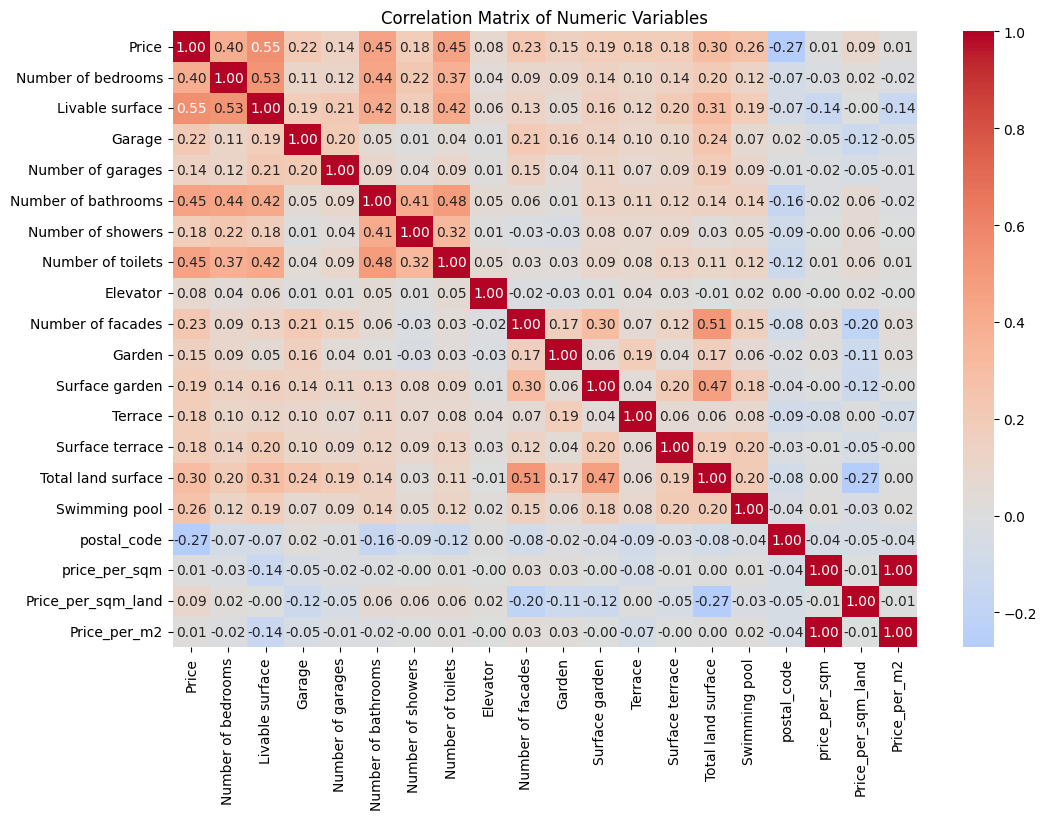

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df8.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df8[numeric_cols].corr()

# Correlation of all variables with Price
price_corr = corr_matrix['Price'].sort_values(ascending=False)
print("Correlation with Price:")
print(price_corr)

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()



How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?
We can use the correlation matrix (already computed) and a cluster map to visualize clusters of correlated variables.

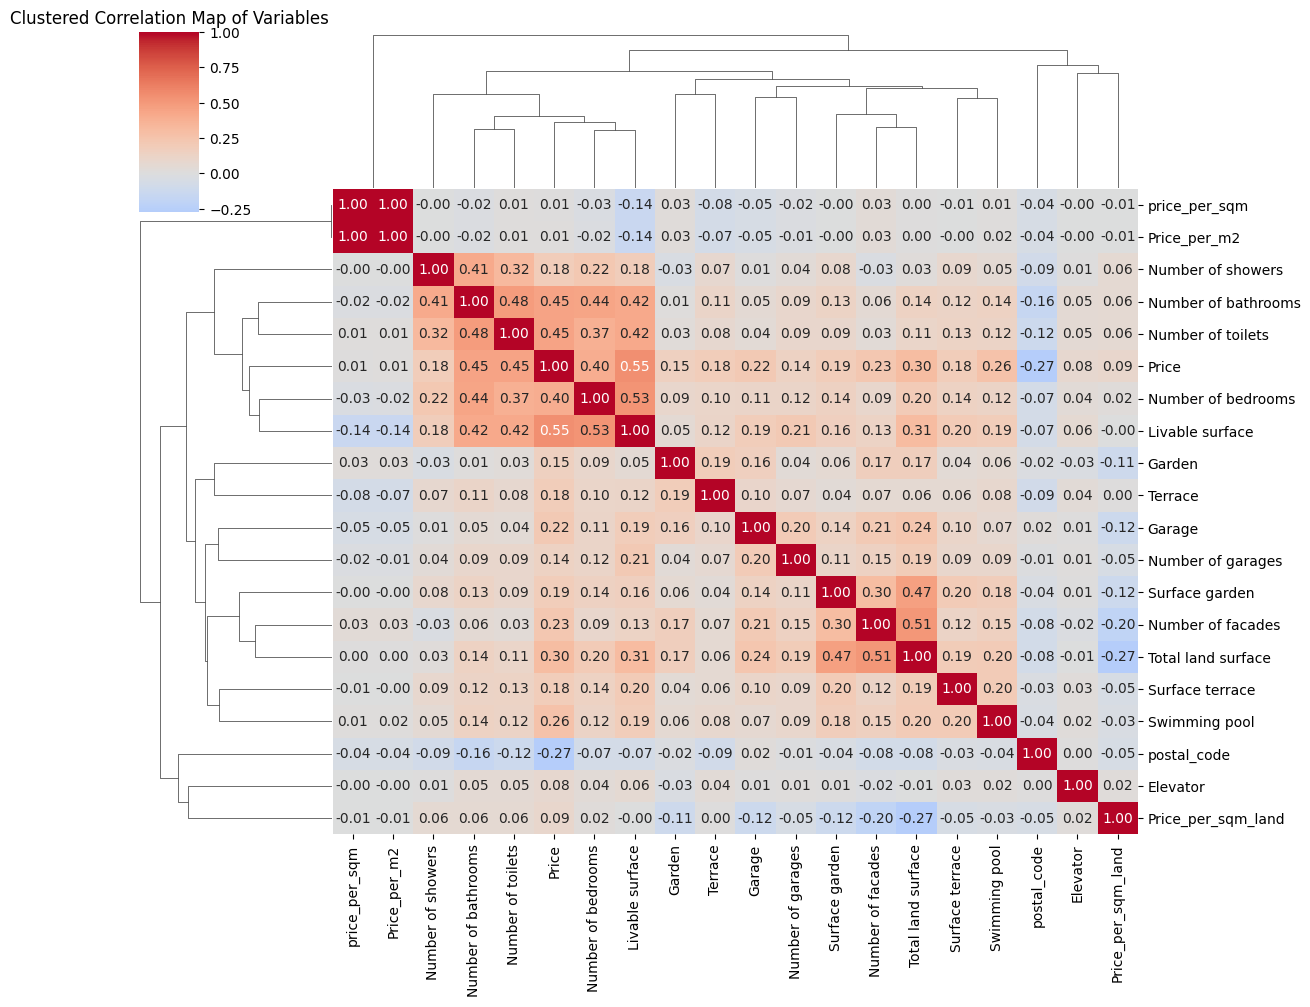

In [173]:
# Cluster map of correlation matrix to find groups
sns.clustermap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, figsize=(12, 10))
plt.title("Clustered Correlation Map of Variables")
plt.show()


Which five variables do you consider the most important and why?

In [174]:
# Top 5 most correlated numeric variables with Price
top5_vars = price_corr.abs().sort_values(ascending=False).head(6)  # head(6) includes Price itself
top5_vars = top5_vars.drop('Price')  # exclude Price
print("Top 5 variables most correlated with Price:")
print(top5_vars)


Top 5 variables most correlated with Price:
Livable surface        0.548897
Number of toilets      0.453101
Number of bathrooms    0.451464
Number of bedrooms     0.397206
Total land surface     0.300554
Name: Price, dtype: float64


In [175]:
import plotly.express as px
import pandas as pd

# Select numeric columns
numeric_cols = df8.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df8[numeric_cols].corr()

# Correlation of all variables with Price
price_corr = corr_matrix['Price'].drop('Price')  # exclude Price itself

# Top 5 variables by absolute correlation
top5 = price_corr.abs().sort_values(ascending=False).head(5)
top5_df = price_corr[top5.index].reset_index()
top5_df.columns = ['Variable', 'Correlation with Price']

# Bar chart
fig = px.bar(
    top5_df,
    x='Variable',
    y='Correlation with Price',
    text='Correlation with Price',
    title='Top 5 Variables Most Correlated with Price',
    labels={'Correlation with Price': 'Correlation with Price'},
    color='Correlation with Price',
    color_continuous_scale='Viridis'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]), height=500)

fig.show()


How are the number of properties distributed according to their surface?

In [176]:
import plotly.express as px
import pandas as pd

# Clean the columns: convert to numeric
surface_cols = ['Livable surface', 'Total land surface', 'Surface garden']
for col in surface_cols:
    df8[col] = pd.to_numeric(df8[col], errors='coerce')

# Create individual histograms
for col in surface_cols:
    fig = px.histogram(
        df8,
        x=col,
        nbins=50,
        title=f"Distribution of {col}",
        labels={col: f"{col} (m²)"},
        marginal="box"  # optional: adds box plot above
    )
    fig.update_layout(template="plotly_white", height=500)
    fig.show()

